In [7]:
import os
from pathlib import Path

from atdata import (
    Dataset,
    SampleBatch,
)
import toile.schema as schema

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
/Users/max/buckets/_tmp/generic/_fail/cx43_fl_2-40x-full_fov-000000.tar

In [52]:
# file_pattern = (
#         Path( os.path.expanduser( '~' ) )
#         / 'buckets' / '_tmp'
#         / 'generic' / 'uncaging4'
#         / 'bath_app-16x-{shard_id}.tar'
    # ).as_posix()

file_pattern = (
        Path( os.path.expanduser( '~' ) )
        / 'buckets' / '_tmp'
        / 'generic' / '_fail'
        / 'cx43_fl_2-40x-full_fov-{shard_id}.tar'
    ).as_posix()

dataset_url = file_pattern.format( shard_id = '{000000..000002}' )
ds = Dataset[schema.Frame]( dataset_url )

In [53]:
batch: SampleBatch[schema.Frame]
for batch in ds.shuffled( batch_size = 16 ):
    print( batch )
    break

In [54]:
batch.image[0]

array([[[  0,   0,   0, ...,   0,   0,  60],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0, 441, 130, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ..., 296, 168,   0]],

       [[  0,   0, 358, ..., 112,   0,   0],
        [  0,   0,  30, ...,   0,   0,   0],
        [  0, 232, 464, ...,   0,   0,   0],
        ...,
        [  0, 212,   0, ...,   0,   0,   0],
        [289, 163, 319, ...,  71,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]]],
      shape=(2, 512, 512), dtype=uint16)

In [56]:
list( batch.metadata[0].keys() )

['uuid',
 'date_acquired',
 'scale_x',
 'scale_unit',
 'scale_y',
 'scale_z',
 't_unit',
 'size_x',
 'size_y',
 'size_z',
 'size_t',
 'channels',
 'frame']

In [61]:
batch.metadata[0]

{'uuid': '0a85475f-3a1e-4420-ae33-d413f5e9d289',
 'date_acquired': '2021-02-11T13:17:00',
 'scale_x': 0.644400046343916,
 'scale_unit': 'um',
 'scale_y': 0.644400046343916,
 'scale_z': 1.0,
 't_unit': 's',
 'size_x': 512,
 'size_y': 512,
 'size_z': 1,
 'size_t': 427,
 'channels': [{}],
 'frame': {'position_x': -2747.875,
  'position_y': 1037.917,
  'position_z': 32.975,
  't_index': 206,
  't': 144.96908040000002,
  'uuid': '91579d3f-6b16-41d5-be2d-a1705c14001c'}}

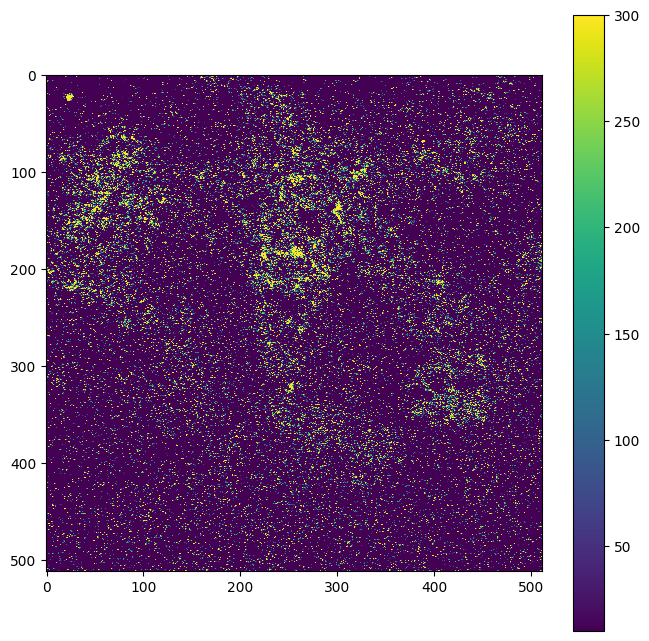

In [59]:
plt.figure( figsize = (8, 8 ) )
plt.imshow( batch.image[0, 0, :, :],
    interpolation = 'nearest',
    clim = (10, 300),
)
plt.colorbar()
plt.show()

---

In [64]:
import re

def string_to_dict(string, pattern):
    regex = re.sub(r'{(.+?)}', r'(?P<_\1>.+)', pattern)
    values = list(re.search(regex, string).groups())
    keys = re.findall(r'{(.+?)}', pattern)
    _dict = dict(zip(keys, values))
    return _dict

In [65]:
test_template = "{file_date}_{sensor}p{age_sex}_{slice_id}_{concentration}uM{compound}-{recording_id}"
test_filled = '20210622_CytoGp30m_S3_25uMBaclofen-006'
x = string_to_dict( test_filled, test_template )

In [66]:
x

{'file_date': '20210622',
 'sensor': 'CytoG',
 'age_sex': '30m',
 'slice_id': 'S3',
 'concentration': '25',
 'compound': 'Baclofen',
 'recording_id': '006'}

---

In [67]:
file_pattern = (
        Path( os.path.expanduser( '~' ) )
        / 'buckets' / '_tmp'
        / 'generic' / 'uncaging6'
        / 'bath_app-16x-{shard_id}.tar'
    ).as_posix()

dataset_url = file_pattern.format( shard_id = '{000000..000016}' )
ds = Dataset[schema.Frame]( dataset_url )

In [80]:
import atdata
from dataclasses import dataclass
from numpy.typing import NDArray
from typing import (
    TypeAlias,
    Literal,
)

BathApplicationCompound: TypeAlias = Literal[
    'baclofen',
    'tACPD',
    'unknown',
]

@dataclass
class BathApplicationFrame( atdata.PackableSample ):
    """TODO"""
    ##

    applied_compound: BathApplicationCompound
    """TODO"""
    image: NDArray
    """TODO"""
    t_index: int
    """Frame index in the overall sequence of the original recording"""
    t: float
    """Time (in seconds) this frame was captured after the start of the original recording"""

    date_acquired: str | None = None
    """ISO timestamp at approximately when the experiment was performed"""

    mouse_id: str | None = None
    """Identifier of the mouse this slice was taken from"""
    slice_id: str | None = None
    """Identifier of the slice this recording was made from"""
    fov_id: str | None = None
    """Identifier of the field of view within an individual slice that was
    recorded
    """
    movie_uuid: str | None = None
    """OME UUID of the full tseries"""

    scale_x: float | None = None
    """The size of each pixel in the $x$-axis (in microns)"""
    scale_y: float | None = None
    """The size of each pixel in the $y$-axis (in microns)"""


#

##
# Lenses

@atdata.lens
def _bath_application_frame_to_typed( s: schema.Frame ) -> BathApplicationFrame:
    assert s.metadata is not None
    return BathApplicationFrame(
        # TODO
        applied_compound = 'unknown',
        image = s.image[0],
        t_index = s.metadata['frame']['t_index'],
        t = s.metadata['frame']['t'],
        #
        date_acquired = s.metadata['date_acquired'],
        movie_uuid = s.metadata['uuid'],
        scale_x = s.metadata['scale_x'],
        scale_y = s.metadata['scale_y'],
    )

{(<class 'toile.schema.SliceRecordingFrame'>, <class 'toile.schema.ImageSample'>): <atdata.lens.Lens object at 0x113f294c0>, (<class 'toile.schema.Frame'>, <class '__main__.BathApplicationFrame'>): <atdata.lens.Lens object at 0x1163356a0>, (<class 'toile.schema.Frame'>, <class '__main__.BathApplicationFrame'>): <atdata.lens.Lens object at 0x11900e5a0>, (<class 'toile.schema.Frame'>, <class '__main__.BathApplicationFrame'>): <atdata.lens.Lens object at 0x1192065a0>, (<class 'toile.schema.Frame'>, <class '__main__.BathApplicationFrame'>): <atdata.lens.Lens object at 0x1191d6ff0>}


In [105]:
for sample in ds.shuffled( batch_size = None ):
    sample_view = _bath_application_frame_to_typed( sample )
    break

In [106]:
sample_view

BathApplicationFrame(applied_compound='unknown', image=array([[  0, 199,  12, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0, 180,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]],
      shape=(512, 512), dtype=uint16), t_index=41, t=28.853069400000003, date_acquired='2021-06-22T12:58:43', mouse_id=None, slice_id=None, fov_id=None, movie_uuid='d22f6a65-b3e2-46c2-ba5c-551920af1fe3', scale_x=1.614363092472119, scale_y=1.614363092472119)

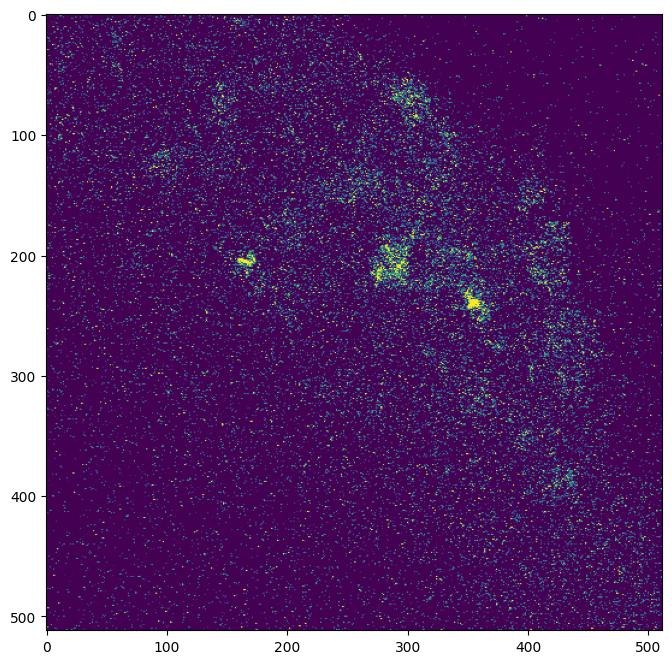

In [107]:
plt.figure( figsize = (8, 8) )
plt.imshow( sample_view.image, clim = (0, 200) )
plt.show()